In [28]:
import pandas as pd
import numpy as np
import joblib


In [31]:
src = r"E:\1_RecSys\Recommender\data\collaborative\v2\2_user_item_matrix.pkl"
user_item_matrix = joblib.load(src)

Matrix shape: (610, 1297)
Matrix type: <class 'scipy.sparse._csr.csr_matrix'>
Matrix non-zeros: 54082
Matrix sparsity: 0.068357
Found 0 empty items at indices: []


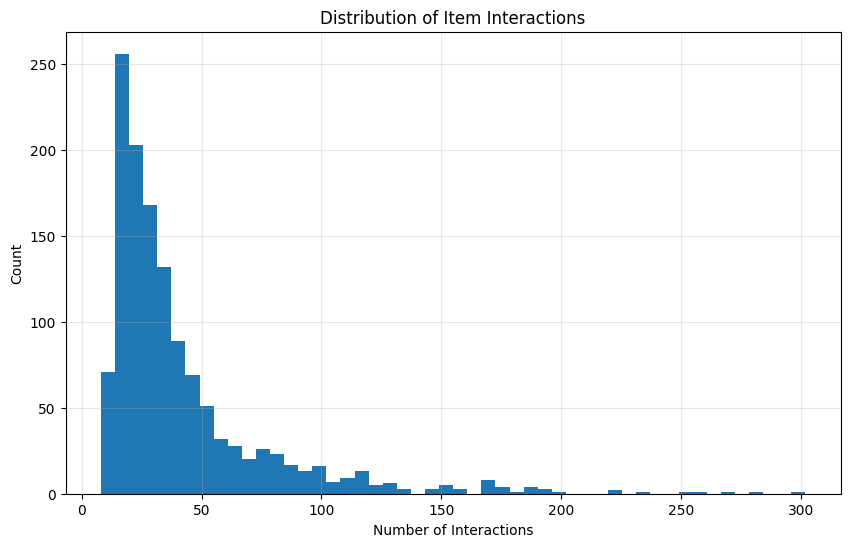

In [32]:
# Print basic information
from matplotlib import pyplot as plt


print(f"Matrix shape: {user_item_matrix.shape}")
print(f"Matrix type: {type(user_item_matrix)}")
print(f"Matrix non-zeros: {user_item_matrix.nnz}")
print(f"Matrix sparsity: {user_item_matrix.nnz / (user_item_matrix.shape[0] * user_item_matrix.shape[1]):.6f}")

# Convert to CSC format for efficient column operations
matrix_csc = user_item_matrix.tocsc()

# Count non-zeros in each column (item)
item_interaction_counts = np.diff(matrix_csc.indptr)

# Find empty items (columns with all zeros)
empty_item_indices = np.where(item_interaction_counts == 0)[0]

print(f"Found {len(empty_item_indices)} empty items at indices: {empty_item_indices}")

# Visualize item interaction distribution
plt.figure(figsize=(10, 6))
plt.hist(item_interaction_counts, bins=50)
plt.title('Distribution of Item Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

# If empty items were found, check them against the original data if possible
if len(empty_item_indices) > 0:
    print("\nItems with no interactions:")
    for idx in empty_item_indices:
        print(f"Item ID: {idx}")
        
    # Check items with very few interactions (might be relevant)
    few_interactions = np.where((item_interaction_counts > 0) & (item_interaction_counts <= 5))[0]
    print(f"\nFound {len(few_interactions)} items with 1-5 interactions")


In [ ]:
print(arr.shape)
print(arr[:])


In [26]:
# Check rows (users) that are all zeros
nonzero_counts = arr.getnnz(axis=1)
zero_vector_users = np.where(nonzero_counts == 0)[0]

print(f"Number of users with zero vectors: {len(zero_vector_users)}")
print(f"User indices with zero vectors: {zero_vector_users}")

Number of users with zero vectors: 0
User indices with zero vectors: []


In [ ]:
# Check for zero vectors (rows where all elements are 0)
zero_vector_indices = np.where(np.all(arr == 0, axis=1))[0]

print(f"Indices of zero vectors: {zero_vector_indices}")
print(f"Number of zero vectors: {len(zero_vector_indices)}")